## Tarea # 1 Edwin Molina

In [ ]:
# Importando bibliotecas

import argparse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from kneed import KneeLocator
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
sns.set()

In [ ]:
pip install kneed

In [ ]:
# Cargar dataset

datos = pd.read_csv('/content/drive/MyDrive/PYTHON VERITAS/Songs.csv')

In [ ]:
datos.head(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [ ]:
datos.tail(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
174384,0.00917,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.00006,6,0.178,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.186,2020
174385,0.79500,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.00000,4,0.196,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.228,2021
174386,0.80600,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.92000,4,0.113,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.714,2020
174387,0.92000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.00000,0,0.113,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.320,2021
174388,0.23900,['Roger Fly'],0.677,197710,0.460,0,57tgYkWQTNHVFEt6xDKKZj,0.89100,7,0.215,-12.237,1,Improvisations,0,2020-12-09,0.0258,112.208,0.747,2020


In [ ]:
# Inspeccionn de datos

datos.shape

(174389, 19)

In [ ]:
# Datos nulos

datos.isnull().sum()


acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

En la inspeccion de datos no se han encontrado datos nulos dentro del dataset.

In [ ]:
# Validando los datos

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [ ]:
datos.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


## Descripcion de datos

In [ ]:
datos['duration_ms']=datos['duration_ms'].astype('int')

In [ ]:
# Analisis de variable "acousticness"

datos['acousticness'].describe()

count    174389.000000
mean          0.499228
std           0.379936
min           0.000000
25%           0.087700
50%           0.517000
75%           0.895000
max           0.996000
Name: acousticness, dtype: float64

In [ ]:
datos['acousticness'].mode()

0    0.995
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



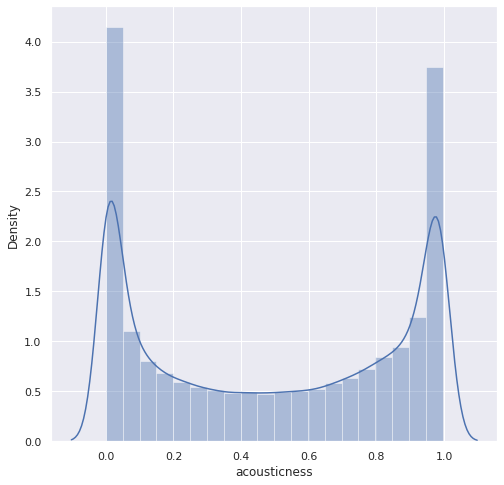

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(datos.acousticness,bins=20);

La variable acousticness es una medida para identificar si la cancion es acustica, la medida esta entre 0 y 1. Mientras más cercana al 1 se encuentre más confidencia hay de que dicha cancion es acustica, 0 representa que la canción no es acustica del todo. 

* En cuanto a la media se observa que el 50% de los datos estan por arriba de 0.499228 y el otro 50% de los datos se encuentra debajo de este numero. 
* La desviacion estandar tiene un valor de 0.379936 que representa la dispercion de los datos en cuanto al promedio. 
* El minimo de los datos es de 0.000000 el cual representa menor coincidencia que la cancion sea acustica.
* El percentil 1 o 25% representa el 25% de los datos son menores o iguales a 0.087700. 
* El 50% que tambien representa a la mediana, tiene valores menores o iguales a 0.517000.
* El 75% representa a los valores que son menores o iguales a 0.895000.
* La moda tiene un valor de 0.995, es decir que 0.995 es el dato que más se repite para esta variable. 
* El valor maximo es de 0.996000, el cual representa una mayor coincidencia de que la cancion se acustica por ser un valor cercano a 1. 




In [ ]:
# Analisis de variable "danceability"

datos['danceability'].describe()

count    174389.000000
mean          0.536758
std           0.176025
min           0.000000
25%           0.414000
50%           0.548000
75%           0.669000
max           0.988000
Name: danceability, dtype: float64

In [ ]:
datos['danceability'].mode()

0    0.565
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



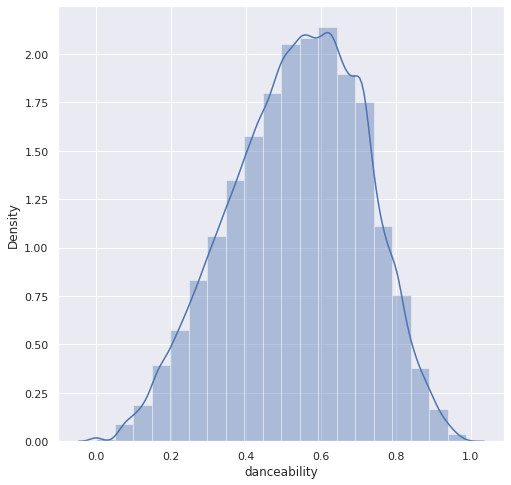

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(datos.danceability,bins=20);

La variable danceability, se describe a si la cancion tomando en cuenta caracteristicas como ritmo, tempo y otras, se considera apta para bailar o no. Esta medida entre 0 y 1, siendo 0 una cancion que no es bailable y 1 una cancion que si es bailable. 

* Se observa que la media es de 0.536758 es decir que el 50% de los datos son menores o iguales a 0.536758 y el otro 50% son mayores o iguales. 
* La desviacion estandar de esta variable es de 0.176025, la cual representa la dispersion de los datos. 
* El valor minimo es de 0.000000 el cual representa una nula capacidad para bailar con la cacion. 
* El percentil 25 es de 0.414000, lo cual representa que el 25% de los datos de esta variable son menores o iguales a 0.414000.
* El perceptil 50 o 50% de los datos que tambien representa la media, tiene un valor de 0.548000, lo cual indica que el 50% de los datos es menor o igual y el otro 50% son mayores o iguales.
* El percentil 75 o el 75% representa un valor de 0.669000, lo cual indica que el 75% de los datos son menores o iguales a 0.669000. 
* El valor maximo de esta variable es de 0.988000 es decir que son datos que se consideran bailables por estar cercanos al 1. 
* La moda de esta variable es de 0.565, lo cual representa el valor que más se repite entre todas las variables. 

Se observa en el grafico que esta variable muestra una distribucion normal.

In [ ]:
# Analisis de variable "duration_ms"

datos['duration_ms'].describe()

count    1.743890e+05
mean     2.328100e+05
std      1.483958e+05
min      4.937000e+03
25%      1.661330e+05
50%      2.057870e+05
75%      2.657200e+05
max      5.338302e+06
Name: duration_ms, dtype: float64

In [ ]:
datos['duration_ms'].mode()

0    150000
1    180000
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



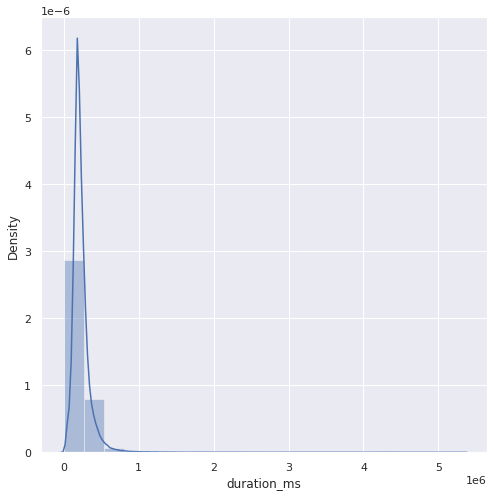

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(datos.duration_ms,bins=20);

Esta variable describe la duracion de la cancion en milisegundos. 

* La mediana tiene un valor de 23281(3.88 min) lo cual describe que el 50% de los datos son menores o iguales y el otro 50% son mayores o iguales.
* La desviacion estandar de los datos es de 1483958 milisegundos. 
* El valor minimo es de 4937 milisegundos, lo cual representa que hay canciones que tienen una duracion menor a 1 minuto.
* El 25% o el percentil 25 representa que el 25% de los datos son menores o iguales a 166133 milisegundos, es decir que son canciones con duracion menor a los 2.78 min. 
* El 50% o el percetil 50, que tambien representa la media, tiene un valor de 205787 milisegundos, equivalente a 3.5 min. Esto significa que el 50% de los datos son menores o iguales a este valor. 
* El percentil 75 o el 75%, representa un valor de 265720 milisegundos, lo cual indica que el 75% de los valores son menores o iguales a esta cifra de duracion equivalente a los 4.5 min. 
* El valor maximo de los datos es de 533830 milisegundo. 
* La moda de esta variable tiene dos valores, 150000 y 180000 que son entre 2.5 y 3 min. Esto quiere decir que las canciones tienen una duracion que se repite entre más veces entre estos valores 2.5 y 3 min. 

Se puede observar en el grafico que esta distribucion es asimetrica postiva debido a la forma de izquierda a derecha que presenta. Lo que representa que las canciones tienen una duracion que va desde 1 min y disminuye a partir de los 3 min. 

In [ ]:
# Analisis de variable "energy"

datos['energy'].describe()

count    174389.000000
mean          0.482721
std           0.272685
min           0.000000
25%           0.249000
50%           0.465000
75%           0.711000
max           1.000000
Name: energy, dtype: float64

In [ ]:
datos['energy'].mode()

0    0.195
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



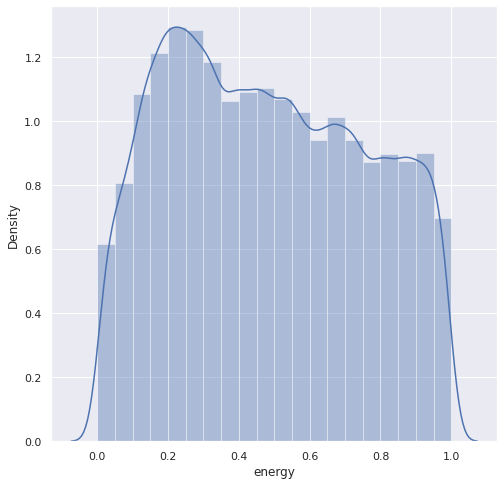

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(datos.energy,bins=20);

La variable energy se mide de un rango entre 0 y 1, en donde con las cualidades en conjunto se define si las canciones tienen cierto nivel de energia o intensidad a traves de la melodia, rapidez y el ruido de la cancion. El 0 representa que la cancion es muy poca o tiene nula energia y el 1 representa mucha intensidad y energia en la cancion.

* La mediana de esta variable es de 0.482721, esto quiere decir que el 50% de los datos son menores o iguales a 0.482721 y el otro 50% es mayor o igual al valor de 0.482721 que indica la energia en las canciones. 
* La desviacion estandar para esta variable es de 0.272685, lo cual demuestra la dispercion de los datos.
* El valor minimo es de 0.000000 el cual representa 0 compatibilidad con que la cancion sea energetica. 
* El percentil 25 o el 25% representa que el 25% de los datos son menores o iguales a 0.249000. 
* El percentil 50 o la media, con un valor de 0.465000 representa que el 50% de los datos son menores o iguales a 0.465000 y el otro 50% de los datos son mayores o iguales a 0.465000.
* El 75% o percentil 75 con un valor de 0.711000, representa que el 75% de los datos son menores o iguales a 0.711000.
* El valor maximo de esta variable es de 1.0, lo cual representa una alta o la maxima compatibilidad con que la cancion sea energetica. 
* La moda es de 0.195, es decir que este es el valor que más repite entre todas las variables. 

Se observa en la grafica que esta tiene una distribucion multimodal debido a que durante toda la grafica se pueden observar diferentes picos maximos.  

In [ ]:
# Analisis de variable "explicit"

datos['explicit'].describe()

count    174389.000000
mean          0.068135
std           0.251978
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: explicit, dtype: float64

In [ ]:
datos['explicit'].mode()

0    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



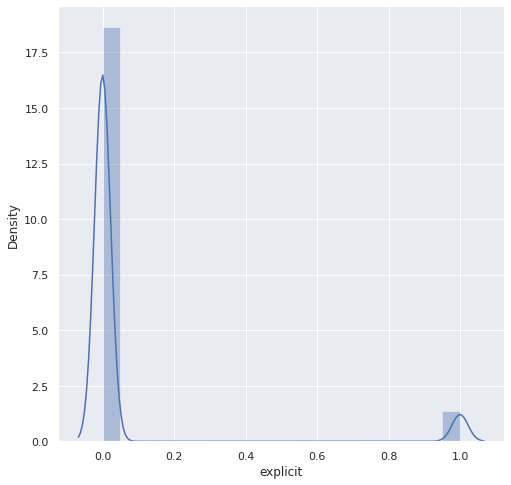

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(datos.explicit,bins=20);

La variable explicit se mide especificamente entre 0 y 1 0 siendo negativo y 1 positivo a si la cancion tiene contenido explicito o considerado para mayores de edad.

* La mediana de esta variable es de 0.0 es decir que el 50% de los datos son menores o iguales a 0 y el otro 50% de los datos son mayores o iguales a 0.
* La desviacion estandar tiene un valor de 0.251978 lo cual representa la distribucion de los datos. 
* Para el valor minimo, 25%, 50% y 75% se tiene un valor de 0 para cada una de las caracteristicas.
* El valor maximo de esta variable es de 1. 
* El valor que más se repite es el 0 por lo que este se convierte en la moda.

La grafica se observa que tiene un comportamiento bimodal ya que se observa dos maximos sin embargo existe un mayor positivo. 

In [ ]:
# Analisis de variable "instrumentalness"

datos['instrumentalness'].describe()

count    174389.000000
mean          0.197252
std           0.334574
min           0.000000
25%           0.000000
50%           0.000524
75%           0.252000
max           1.000000
Name: instrumentalness, dtype: float64

In [ ]:
datos['instrumentalness'].mode()

0    0.0
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



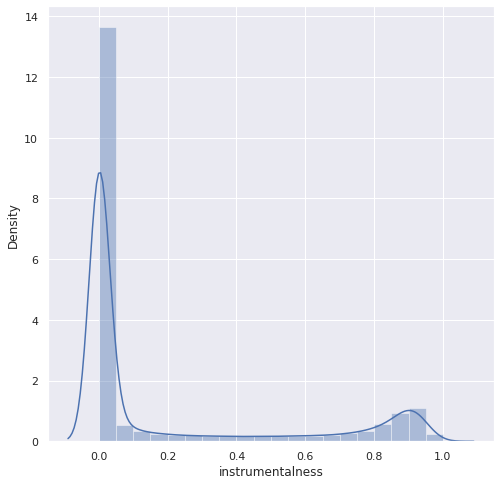

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(datos.instrumentalness,bins=20);

La variable instrumentalness mide en valores entre 0 y 1 si la cancion contiene registros vocales dentro de la misma, es decir si la cancion contiene voz y musica o solamente musica. 

* La mediana de esta variable es de 0.197252, esto significa que el 50% de los datos son menores o iguales a 0.197252 y el otro 50% son mayores o iguales a 0.197252. 
* La desviacion estandar tiene un valor de 0.334574, esto quiere decir que existe una dispercion alta en los datos. 
* El valor minimo de los datos es de 0. 
* El 25% de los datos son menores o iguales a 0. 
* El 50% de los datos y respectivamente la media, tiene un valor de 0.000524. 
* El 75% de los datos son menores o iguales a 0.252000. 
* El valor maximo de los datos es igual a 1 
* La moda de los datos es igual a 0, lo que se refiere que los datos que más se repiten son los de no instrulmental. 

La grafica muestra una distribucion con un mayor sesgo hacia la derecha lo que representa una asimetria positiva. 

In [ ]:
# Analisis de variable "key"

datos['key'].describe()

count    174389.000000
mean          5.205305
std           3.518292
min           0.000000
25%           2.000000
50%           5.000000
75%           8.000000
max          11.000000
Name: key, dtype: float64

In [ ]:
datos['key'].mode()

0    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



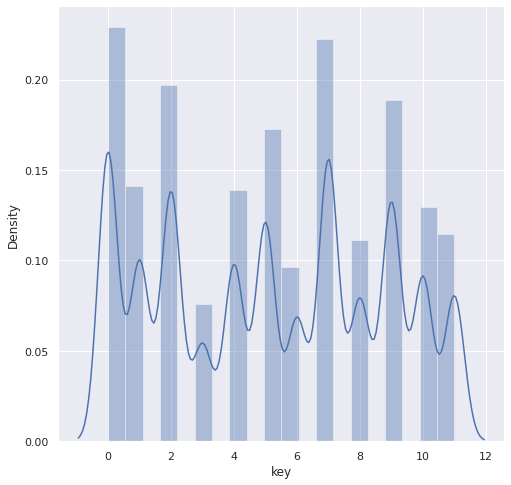

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(datos.key,bins=20);

La variable key esta medida en valores de 0 a 11 que equivalen a las 12 notas principales naturales y sus alteraciones.

* La mediana de esta variable equivale a 5.205 lo que quiere decir que el 50% de los datos son menores o iguales a este valor y el otro 50% de los datos son mayores o iguales. 
* El valor minimo de estos datos es de 0.0 que equivale a la nota natural de C (DO). 
* El 25% de los datos son menores o iguales a 2.0 que equivale a la nota de D (RE).
* El 50% de los datos que equivale a la media es de un valor de 5.0 que equivale a la nota de F(FA) lo que indica que el 50% de los datos son menores o iguales a 5. 
* El 75% de los datos es de 8.0 que equivale a la nota de G#(Sol sostenido) que indica que el 75% de los datos son menores o iguales a 8. 
* La nota que más se repite es la de C que quivale a 0, por lo que esta es la media de estos datos. 

La grafica se puede observar con una distribucion multimodal por las diferentes maximos que presenta a lo largo de la misma. 

In [ ]:
# Analisis de variable "liveness"

datos['liveness'].describe()

count    174389.000000
mean          0.211123
std           0.180493
min           0.000000
25%           0.099200
50%           0.138000
75%           0.270000
max           1.000000
Name: liveness, dtype: float64

In [ ]:
datos['liveness'].mode()

0    0.111
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



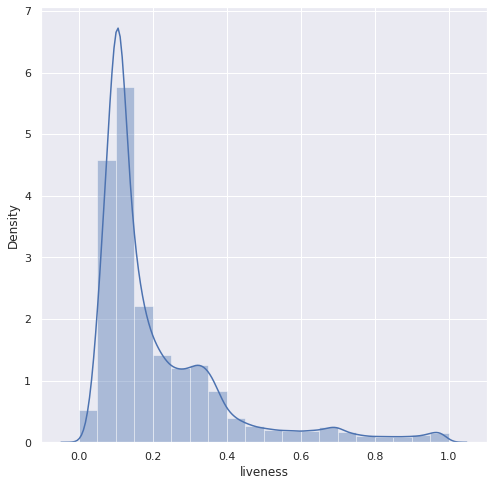

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(datos.liveness,bins=20);

La variable liveness hace referencia a la existencia de audiencia en la grabacion, es decir si la cancion tiene algun aspecto audio en vivo, 0 es menor coincidencia y 1 es mayor coincidencia. 

* La mediana de esta variable equivale a 0.2 lo que quiere decir que el 50% de los datos son menores o iguales a este valor y el otro 50% de los datos son mayores o iguales. 
* El valor minimo de estos datos es de 0.0.
* El 25% de los datos son menores o iguales a 0 lo que indica una menor coincidencia con elementos en vivo.
* El 50% de los datos que equivale a la media es de un valor de 0.13.
* El 75% de los datos es de 0.27 que equivale a que el 75% de los datos son menore o iguales a 0.27.
* La moda es de 0.1 que es el valor que mas veces se repite.

La grafica se puede observar con una distribucion normal con un cesgo positivo hacia la derecha. 

In [ ]:
# Analisis de variable "loudness"

datos['loudness'].describe()

count    174389.000000
mean        -11.750865
std           5.691591
min         -60.000000
25%         -14.908000
50%         -10.836000
75%          -7.499000
max           3.855000
Name: loudness, dtype: float64

In [ ]:
datos['loudness'].mode()

0   -7.578
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



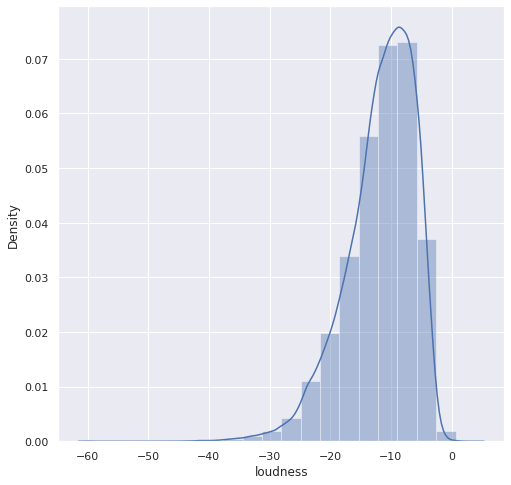

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(datos.loudness,bins=20);

La variable loudness describe la distribucion de ruido en general en decibels el rango va desde -60 hasta 3. 

* La mediana de esta variable equivale a -11.75 lo que quiere decir que el 50% de los datos son menores o iguales a este valor y el otro 50% de los datos son mayores o iguales. 
* El valor minimo de estos datos es de -60.00.
* El 25% de los datos son menores o iguales a -14.91 lo que indica una menor coincidencia con elementos de ruido. 
* El 50% de los datos que equivale a la media es de un valor de -10.83
* El 75% de los datos es de 0.27 que equivale a que el 75% de los datos son menore o iguales a -7.49
* La moda es de -7.58 que es el valor que mas veces se repite.

La grafica se puede observar con una distribucion normal con un cesgo negativo hacia la izquierda. 

In [ ]:
# Analisis de variable "mode"

datos['mode'].describe()

count    174389.000000
mean          0.702384
std           0.457211
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: mode, dtype: float64

In [ ]:
datos['mode'].mode()

0    1
dtype: int64

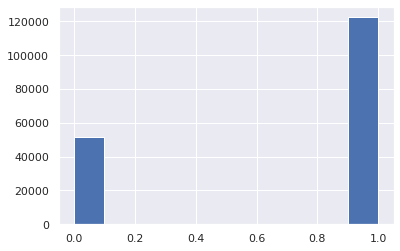

In [ ]:
datos['mode'].hist()

La variable mode describe la tonalidad de las canciones si es en una escala mayor o menor. 0 representa la tonalidad menor y 1 la tonalidad mayor. 

* La mediana de esta variable equivale a 0.7 lo que quiere decir que el 50% de los datos son menores o iguales a este valor y el otro 50% de los datos son mayores o iguales. 
* El valor minimo de estos datos es de 0.00.
* El 25% de los datos son menores o iguales a 0 lo que indica una coincidencia en la tonalidad menor.
* El 50% de los datos que equivale a la media es de un valor de 1 lo que indica que el 50% de los datos tiene una tonalidad mayor.
* El 75% de los datos es de 1 que equivale a que el 75% de los datos son menore o iguales a 1
* La moda es de 1 que es el valor que mas veces se repite.

La grafica se puede observar con una distribucion normal con un cesgo negativo hacia la izquierda. 

In [ ]:
# Analisis de variable "modpopularitye"

datos['popularity'].describe()

count    174389.000000
mean         25.693381
std          21.872740
min           0.000000
25%           1.000000
50%          25.000000
75%          42.000000
max         100.000000
Name: popularity, dtype: float64

In [ ]:
datos['popularity'].mode()

0    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



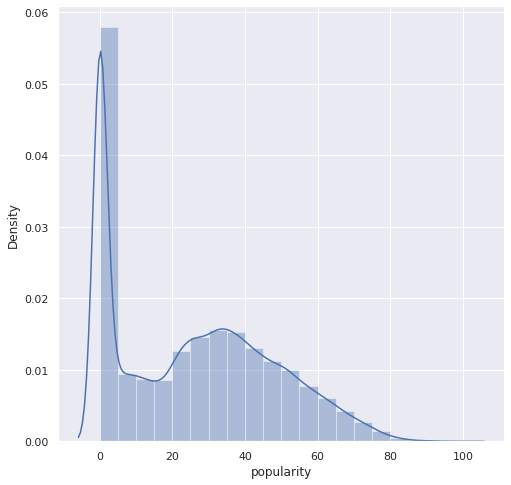

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(datos.popularity,bins=20);

La variable mode describe la tonalidad de las canciones si es en una escala mayor o menor. 0 representa la tonalidad menor y 1 la tonalidad mayor. 

* La mediana de esta variable equivale a 0.7 lo que quiere decir que el 50% de los datos son menores o iguales a este valor y el otro 50% de los datos son mayores o iguales. 
* El valor minimo de estos datos es de 0.00.
* El 25% de los datos son menores o iguales a 0 lo que indica una coincidencia en la tonalidad menor.
* El 50% de los datos que equivale a la media es de un valor de 1 lo que indica que el 50% de los datos tiene una tonalidad mayor.
* El 75% de los datos es de 1 que equivale a que el 75% de los datos son menore o iguales a 1
* La moda es de 1 que es el valor que mas veces se repite.

La grafica se puede observar con una distribucion normal con un cesgo negativo hacia la izquierda. 

In [ ]:
# Analisis de variable "speechiness"

datos['speechiness'].describe()

count    174389.000000
mean          0.105729
std           0.182260
min           0.000000
25%           0.035200
50%           0.045500
75%           0.076300
max           0.971000
Name: speechiness, dtype: float64

In [ ]:
datos['speechiness'].mode()

0    0.0337
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



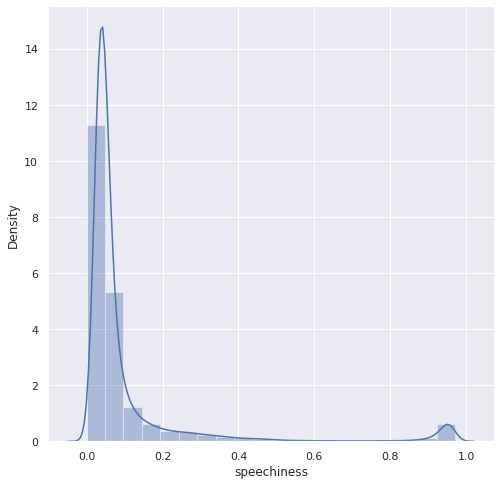

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(datos.speechiness,bins=20);

La variable speechiness describe la existencia de palabras dentro de la cancion, con valores que van desde 0 que describe una menor cantidad o nula existencia de palabras hasta 1 que representa que existe palabras en la cancion.

* La mediana de esta variable equivale a 0.1 lo que quiere decir que el 50% de los datos son menores o iguales a este valor y el otro 50% de los datos son mayores o iguales. 
* El valor minimo de estos datos es de 0.00.
* El 25% de los datos son menores o iguales a 0.03 lo que indica una menor existencia de palabras.
* El 50% de los datos que equivale a la media es de un valor de 0.04 lo que indica que el 50% de los datos tiene una tonalidad mayor.
* El 75% de los datos es de 0.07 que equivale a que el 75% de los datos son menore o iguales a 0.07.
* La moda es de 0.9 que es el valor que mas veces se repite.

La grafica se puede observar con una distribucion normal con un cesgo positivo hacia la derecha.

In [ ]:
# Analisis de variable "tempo"

datos['tempo'].describe()

count    174389.000000
mean        117.006500
std          30.254178
min           0.000000
25%          93.931000
50%         115.816000
75%         135.011000
max         243.507000
Name: tempo, dtype: float64

In [ ]:
datos['tempo'].mode()

0    0.0
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



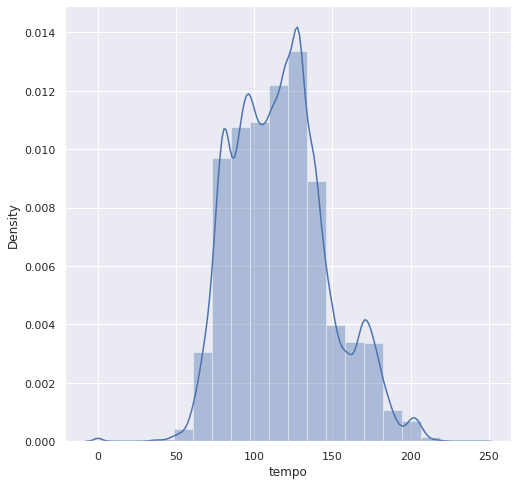

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(datos.tempo,bins=20);

La variable tempo describe el tempo de la cancion en BPM.

* La mediana de esta variable equivale a 117 lo que quiere decir que el 50% de los datos son menores o iguales a este valor y el otro 50% de los datos son mayores o iguales. 
* El valor minimo de estos datos es de 0.00.
* El 25% de los datos son menores o iguales a 93 bpm.
* El 50% de los datos que equivale a la media es de un valor de 115 bpm, es decir que el 50% de los datos son menores o iguales a 115. 
* El 75% de los datos es de 135 que equivale a que el 75% de los datos son menore o iguales a 135.

La grafica se puede observar con una distribucion multimodal debido a la variacion de los tempos en las canciones.

In [ ]:
# Analisis de variable "valence"

datos['valence'].describe()

count    174389.000000
mean          0.524533
std           0.264477
min           0.000000
25%           0.311000
50%           0.536000
75%           0.743000
max           1.000000
Name: valence, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



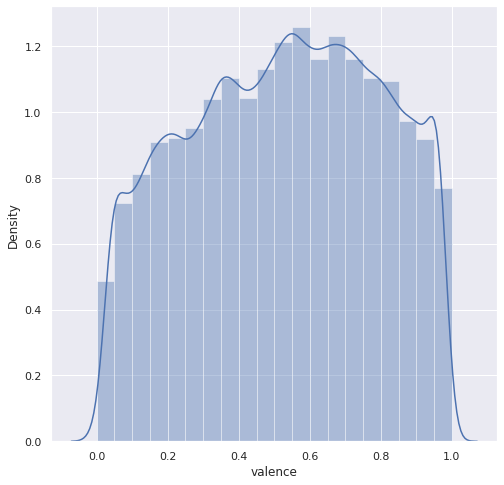

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(datos.valence,bins=20);

La variable valance describe entre 0 y 1 si la cancion es positiva o no, 0 equivale a no positiva y entre más cercano a 1 más positivo segun las caracteristicas de la musica. 

* La mediana de esta variable equivale a 0.5 lo que quiere decir que el 50% de los datos son menores o iguales a este valor y el otro 50% de los datos son mayores o iguales. 
* El valor minimo de estos datos es de 0.00.
* El 25% de los datos son menores o iguales a 0.3.
* El 50% de los datos que equivale a la media es de un valor de 0.53, es decir que el 50% de los datos son menores o iguales a 0.53. 
* El 75% de los datos es de 0,74 que equivale a que el 75% de los datos son menore o iguales a 0.74.

La grafica se puede observar con una distribucion multimodal debido a las variaciones entre los balances de las canciones.

### Relacion de datos a traves de tablas pivot

In [ ]:
datos.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


#### Primero se realizara una modificacion en los datos de Feature Engineering para poder ver las relaciones entre las variables importantes.

In [ ]:
# Feature Engineering
# Se agrega una nueva columna llamada decade para agrupar las diferentes canciones por su año de lanzamiento.

datos['decade'] = (datos['year']//10)*10

In [ ]:
datos.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,decade
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920,1920


### Analisis de variables importantes para la industria a traves de las decadas de 1920 al 2020.

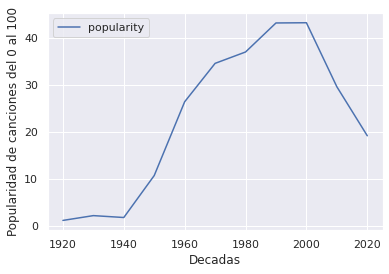

In [ ]:
datos.pivot_table(index= ['decade'], values = ['popularity'], aggfunc='mean').plot()
plt.xlabel('Decadas')
plt.ylabel('Popularidad de canciones del 0 al 100')
plt.show()

En el grafico anterior se tiene una distribucion entre las decadas desde 1920 hasta el 2020, en donde se observa el comportanmiento de la popularidad de las canciones en escalas del 0 al 100, 100 siendo la más popular. Se puede observar que en los primeras decdas de 1920 a 1940 las canciones tienen muy poca popularidad, esto se debe a la falta de informacion musical para esa epoca. A partir de la decada de 1940 se observa que las caciones hasta los 2000 tienen un crecimiento exponencial en la popularidad de las canciones, mostrando que del conjunto total de canciones en estudio una buena cantidad de ellas tienen altos niveles de popularidad. Sin embargo desde la decada de los 2000 hasta 2020 se observa una disminucion en la popularidad de las canciones, esto se puede deber a la diversificacion de generos o la llegada de nuevos generos que se han popularizado más aun como ritmos latinos u orientales. 

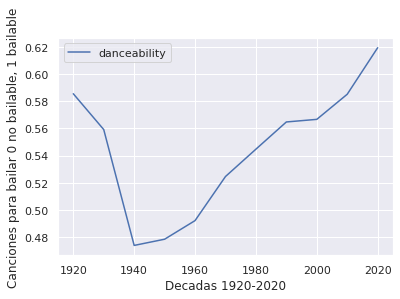

In [ ]:
datos.pivot_table(index= ['decade'], values = ['danceability'], aggfunc='mean').plot()
plt.xlabel('Decadas 1920-2020')
plt.ylabel('Canciones para bailar 0 no bailable, 1 bailable')
plt.show()

En esta grafica se observa el comportamiento de las canciones a traves de las decadas en estudio en cuanto a la danceabilidad de las canciones, es decir si las canciones tienen componentes que son caracteristicos de un rito que se puede bailar. Se observa que en la decada de 1920 las canciones tenian altos niveles de ser bailables, para la decada de 1940 esto disminuyo, se puede deber a los nuevos ritmos que llegaron para esa epoca. Luego apartir de la decada de 1960 se observa un crecimiento exponencial hasta el 2020 en cuanto a los niveles de bailabilidad en las canciones, esto se puede decir a que los nuevos ritmos en las canciones son cada vez dinamicos que permiten a la audiencia poder bailar sin importar el genero de la cancion.

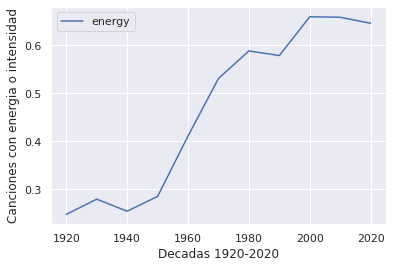

In [ ]:
datos.pivot_table(index= ['decade'], values = ['energy'], aggfunc='mean').plot()
plt.xlabel('Decadas 1920-2020')
plt.ylabel('Canciones con energia o intensidad')
plt.show()

La grafica anterior muestra los niveles de energia o intensidad que tienen las canciones desde 1920 hasta el 2020, esto significa que si las canciones son cercanas al 0 no tienen tanta energia en su melodia u otras caracteristicas, pero entre más cercanas son al 1 más energia poseen. Se observa que desde 1920 hasta 1940 hay una fluctuacion en cuanto a la energia ya que los generos de aquella epoca fueron muy poco contrastantes con intesidad. Desde la decada de 1960 se observa un crecimiento en la energia de las canciones por los nuevos ritos y creaciones que se empezaron a dar hasta hoy en día que las canciones tienen altos niveles de energia muy cercanos al 1.

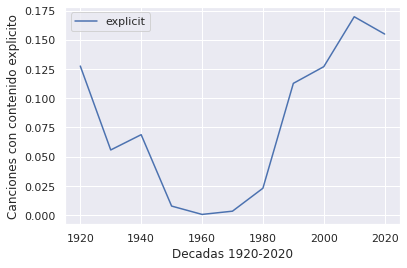

In [ ]:
datos.pivot_table(index= ['decade'], values = ['explicit'], aggfunc='mean').plot()
plt.xlabel('Decadas 1920-2020')
plt.ylabel('Canciones con contenido explicito')
plt.show()

La grafica anterior describe si las canciones desde 1920 hasta el 2020, contienen algun tipo de contenido explicito, 0 siendo nulo contenido explicito y 1 mucha existencia o la si existencia de contenido explicito. Se observa que en los años 1920 hasta 1940 las canciones tenien un alto nivel de contenido explicito pero se debia a las creencias de aquella epoca, esto fue disminuyendo debido a la aceptacion de la sociedad y disminuyendo exponencialmente hasta finales de la decada de los 60s. A partir de los 70s-80s las canciones empiezan a tener mucho más contenido explicito, esto se debe por las diferentes tematicas que se tocaban en las canciones desde aquella epoca, como temas sociales, politicos o simplemente sexuales. Hasta mediados de la decada de los 2010 se observa que empieza a bajar los niveles de explicidad en las canciones y esto se debe a las diferentes polemicas sociales que se pueden generar en las generaciones actuales.

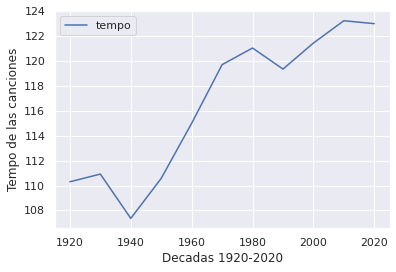

In [ ]:
datos.pivot_table(index= ['decade'], values = ['tempo'], aggfunc='mean').plot()
plt.xlabel('Decadas 1920-2020')
plt.ylabel('Tempo de las canciones')
plt.show()

La grafica anterior muestra los niveles en el tempo expresados en BPM de las canciones entre 1920 hasta 2020. Se puede observar que en las primeras decadas el tempo de las canciones estaba entre 111 y 105 BPM que se puede decir que es caracteristicos de canciones lentas. A partir de la decada de 1940 se empieza a ver un crecimiento en las canciones con mayores niveles de BPM, esto se debe a la llegada de nuevos ritmos y a la incursion de la musica electronica o con computadoras que empiezan a hacer las canciones un poco más aceleradas.

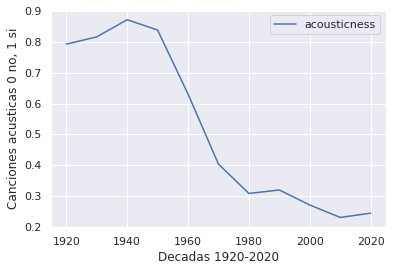

In [ ]:
datos.pivot_table(index= ['decade'], values = ['acousticness'], aggfunc='mean').plot()
plt.xlabel('Decadas 1920-2020')
plt.ylabel('Canciones acusticas 0 no, 1 si')
plt.show()

La grafica anterior muestra las canciones entre 1920 y 2020 que tienen componentes acusticos, es decir que las canciones son instrumentales al 100%, la medida va de 0 a 1, en donde 0 indica poca coincidencia en caracteristicas acusticas y el 1 mucha acusticidad. Se puede observar en la grafica una tendencia muy especifica desde 1920 en donde los niveles son muy cercanos a 1, esto quiere decir que las canciones eran totalmente acusticas, con instrumentos, hasta llegar al 2020 en donde se observa que los niveles son muy cercanos al 0, que indica muy pocos componentes acusticos por el uso de computadores y diferentes consolas que hacen las canciones necesiten cada vez menos de instrumentos reales. 

###  Metodo de reducción de la dimensionada (ACP)

In [ ]:
# Creando una copia de dataset original

data_sopty = datos.copy()

In [ ]:
# Creando nueva estructura
data_sopty.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,decade
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920,1920


In [ ]:
data_sopty.iloc[:, [0,2,3,4,5,7,8,9,10,11,13,15,16,17,19]]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,decade
0,0.991000,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340,1920
1,0.643000,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.9500,1920
2,0.993000,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,4,0.1740,97.600,0.6890,1920
3,0.000173,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,17,0.0425,127.997,0.0422,1920
4,0.295000,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,2,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,0.792,147615,0.866,0,0.000060,6,0.1780,-5.089,0,0,0.0356,125.972,0.1860,2020
174385,0.795000,0.429,144720,0.211,0,0.000000,4,0.1960,-11.665,1,0,0.0360,94.710,0.2280,2020
174386,0.806000,0.671,218147,0.589,0,0.920000,4,0.1130,-12.393,0,0,0.0282,108.058,0.7140,2020
174387,0.920000,0.462,244000,0.240,1,0.000000,0,0.1130,-12.077,1,69,0.0377,171.319,0.3200,2020


In [ ]:
dataSpoty = data_sopty.iloc[:, [0,2,3,4,5,7,8,9,10,11,13,15,16,17,19]]

In [ ]:
# Renombrando variable para utilizarla en Scikit-Learn

X = dataSpoty

In [ ]:
# Normalizando dataframe

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Importando PCA

pca = PCA()
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# El atributo muestra cuanta varianza es explicada por cada uno de las variables
evr = pca.explained_variance_ratio_
evr

array([0.24067623, 0.11987208, 0.0898179 , 0.07765124, 0.07630343,
       0.06466092, 0.06164888, 0.05692776, 0.0537846 , 0.04202212,
       0.0392946 , 0.0295376 , 0.02168953, 0.01810362, 0.00800949])

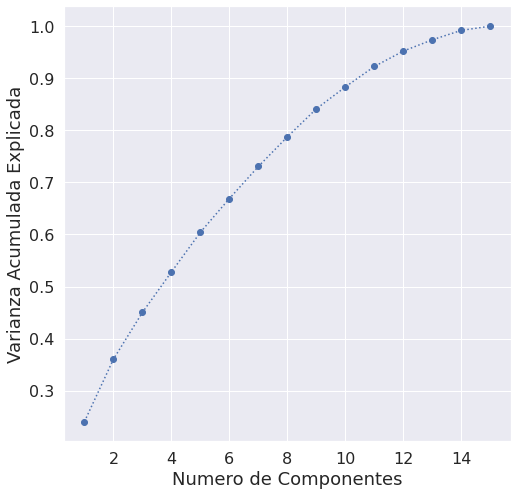

In [ ]:
# Grafico de Componentes principales
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, len(X.columns)+1), evr.cumsum(), marker='o', linestyle=':')
plt.xlabel('Numero de Componentes', fontsize=18)
plt.ylabel('Varianza Acumulada Explicada',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [ ]:
# Numero optimo de componentes a utilizar

for i, exp_var in enumerate(evr.cumsum()):
    if exp_var >= 0.8:
        n_comps = i + 1
        break
print("Numero de Componentes Optimos:", n_comps)
pca = PCA(n_components=n_comps)
pca.fit(X_std)
scores_pca = pca.transform(X_std)

Numero de Componentes Optimos: 9


### Algoritmo de K-Means & PCA

In [ ]:
# Usando el KneedLocator (Codo de Jambu)
wcss = []
max_clusters = 21
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Numero de Clusters Optimos:", n_clusters)

Numero de Clusters Optimos: 6


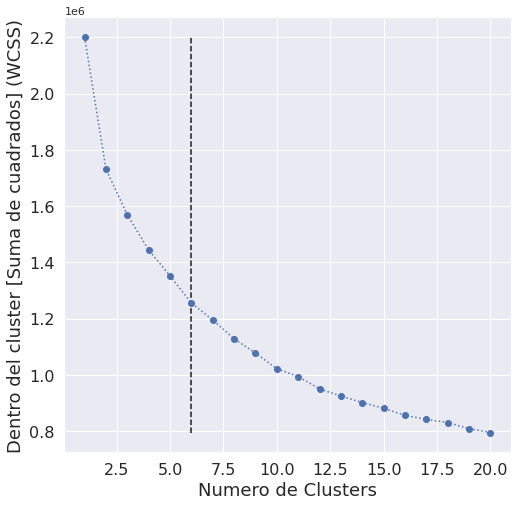

In [ ]:
# Ploteando grafico 
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, 21), wcss, marker='o', linestyle=':')
plt.vlines(KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', 
                       direction='decreasing').knee, ymin=min(wcss), ymax=max(wcss), linestyles='dashed')
plt.xlabel('Numero de Clusters', fontsize=18)
plt.ylabel('Dentro del cluster [Suma de cuadrados] (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [ ]:
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca);

In [ ]:
# Etiquentando cada uno de los datos dentro del cluster respectivo
df_seg_pca_kmeans = pd.concat([pd.DataFrame(X.reset_index(drop=True)), pd.DataFrame(scores_pca)], axis=1)
df_seg_pca_kmeans.columns.values[(-1*n_comps):] = ["Component " + str(i+1) for i in range(n_comps)]
df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_
df_seg_pca_kmeans.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,decade,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Cluster
0,0.991000,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340,1920,1.465385,-1.271636,-0.634401,1.422051,0.163204,-0.484704,-0.530585,-0.716312,1.822210,3
1,0.643000,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.9500,1920,0.084227,-2.206042,-1.521529,0.861208,-1.478952,0.350870,1.301846,-0.989548,0.794990,3
2,0.993000,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,4,0.1740,97.600,0.6890,1920,1.907985,-1.834454,-0.906391,0.072661,2.011477,0.070267,1.236104,-0.602113,0.609160,3
3,0.000173,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,17,0.0425,127.997,0.0422,1920,-0.076838,1.031558,0.121429,0.508051,0.359231,2.303493,0.287316,0.635146,-0.692915,4
4,0.295000,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,2,0.0768,122.076,0.2990,1920,-0.758969,-1.927004,2.376930,1.515466,-0.254287,-0.820974,-0.432381,-0.421234,-0.224443,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



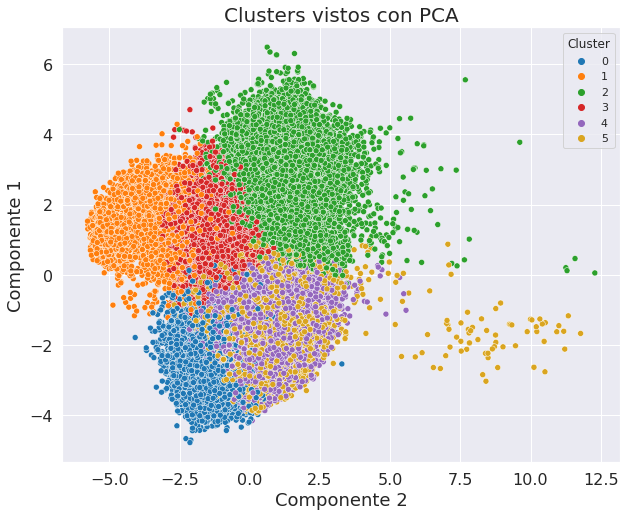

In [ ]:
# Creando visualizacion de los datos con PCA

x = df_seg_pca_kmeans['Component 2']
y = df_seg_pca_kmeans['Component 1']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=df_seg_pca_kmeans['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'goldenrod'])
plt.title('Clusters vistos con PCA', fontsize=20)
plt.xlabel("Componente 2", fontsize=18)
plt.ylabel("Componente 1", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show();


In [ ]:
dataSpoty = data_sopty.iloc[:, [0,2,3,4,5,7,8,9,10,11,13,15,16,17,19]]

In [ ]:
X = dataSpoty

In [ ]:
# K-means sin el codo de Jambu

from sklearn.cluster import KMeans

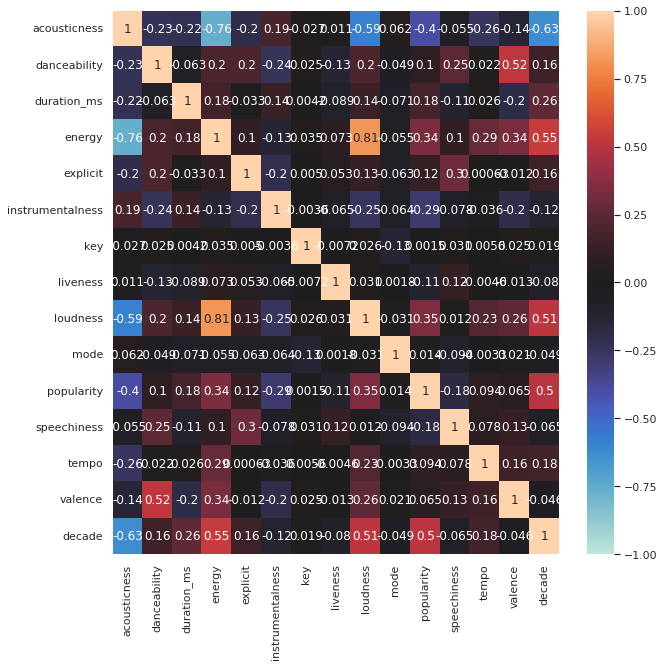

In [ ]:
# Matriz de Correlacion
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(X.corr(method = 'spearman'),annot=True,vmin=-1, vmax=1, center= 0)
plt.show()

In [ ]:
# Extrayendo variables a utilizar, solamente 'budget' y 'gross'

datos1 = X.iloc[:, [3,10]].values

In [ ]:
datos1

array([[ 0.224, 12.   ],
       [ 0.517,  7.   ],
       [ 0.186,  4.   ],
       ...,
       [ 0.589,  0.   ],
       [ 0.24 , 69.   ],
       [ 0.46 ,  0.   ]])

In [ ]:
Y = datos1

In [ ]:
kmeans = KMeans(n_clusters = 3,  init= 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(Y)

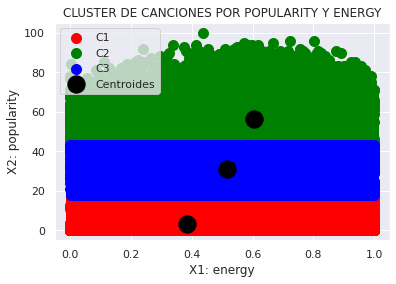

In [ ]:
# Visualizacion de plot de K-means

plt.scatter(Y[y_kmeans == 0, 0], Y[y_kmeans == 0, 1], s = 100, c = 'red', label = 'C1') 
plt.scatter(Y[y_kmeans == 1, 0], Y[y_kmeans == 1, 1], s = 100, c = 'green', label = 'C2')
plt.scatter(Y[y_kmeans == 2, 0], Y[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'C3')

plt.title('CLUSTER DE CANCIONES POR POPULARITY Y ENERGY')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'black', label = 'Centroides')
plt.xlabel('X1: energy')
plt.ylabel('X2: popularity')
plt.legend()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4,  init= 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(Y)

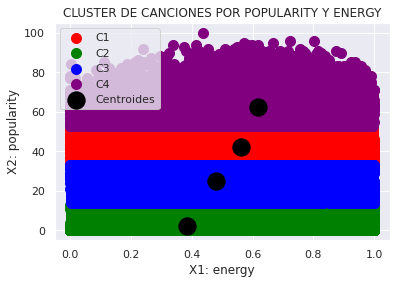

In [ ]:
plt.scatter(Y[y_kmeans == 0, 0], Y[y_kmeans == 0, 1], s = 100, c = 'red', label = 'C1') 
plt.scatter(Y[y_kmeans == 1, 0], Y[y_kmeans == 1, 1], s = 100, c = 'green', label = 'C2')
plt.scatter(Y[y_kmeans == 2, 0], Y[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'C3')
plt.scatter(Y[y_kmeans == 3, 0], Y[y_kmeans == 3, 1], s = 100, c = 'purple', label = 'C4')

plt.title('CLUSTER DE CANCIONES POR POPULARITY Y ENERGY')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'black', label = 'Centroides')
plt.xlabel('X1: energy')
plt.ylabel('X2: popularity')
plt.legend()
plt.show()

Se puede observar en ambos cluster tanto como con el codo de jambu el cual se realizo más arriba, como si el codo, que los clusters presentan una estandarizacion y se observa tambien que existe un crecimiento entre las variables de energia y popularidad, es decir que las canciones a mayor popularidad tienen mayor energia tienen en su melodia. 